In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facenet-model/facenet_keras.h5
/kaggle/input/facenet-img-label/id-pair.csv
/kaggle/input/facenet-img-label/images/images/044746.jpg
/kaggle/input/facenet-img-label/images/images/021556.jpg
/kaggle/input/facenet-img-label/images/images/045235.jpg
/kaggle/input/facenet-img-label/images/images/024570.jpg
/kaggle/input/facenet-img-label/images/images/192464.jpg
/kaggle/input/facenet-img-label/images/images/196492.jpg
/kaggle/input/facenet-img-label/images/images/032486.jpg
/kaggle/input/facenet-img-label/images/images/033404.jpg
/kaggle/input/facenet-img-label/images/images/122251.jpg
/kaggle/input/facenet-img-label/images/images/048016.jpg
/kaggle/input/facenet-img-label/images/images/188155.jpg
/kaggle/input/facenet-img-label/images/images/197109.jpg
/kaggle/input/facenet-img-label/images/images/177808.jpg
/kaggle/input/facenet-img-label/images/images/009563.jpg
/kaggle/input/facenet-img-label/images/images/195701.jpg
/kaggle/input/facenet-img-label/images/images/100063.jpg

In [76]:
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [77]:
# Load the pre-trained Facenet model
model_path = '/kaggle/input/facenet-model/facenet_keras.h5'
model = load_model(model_path)

In [78]:
# Define the input and output tensors
input_tensor = model.input
output_tensor = model.layers[-2].output

In [79]:
# Define the function to preprocess the image
def preprocess_image(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(160, 160))
    img = tf.keras.utils.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.imagenet_utils.preprocess_input(img)
    return img

In [80]:
# Define the img2vec function
def img2vec(img_path):
    # Preprocess the input image
    img = preprocess_image(img_path)

    # Get the embedding vector
    embedding = model.predict(img)

    # Normalize the embedding vector
    embedding = embedding / np.sqrt(np.sum(embedding**2))

    return embedding[0]

In [81]:
# Define the path to the CSV file
csv_file = '/kaggle/input/facenet-img-label/id-pair.csv'

# Load the CSV file into a pandas dataframe
df = pd.read_csv(csv_file)


In [83]:
# Create a list of image paths and pids from the dataframe
img_paths = []
pids = []
for i, row in df.iterrows():
    img_path = '/kaggle/input/facenet-img-label/images/images/' + row['fid'] # Modify this to match your image directory
    img_paths.append(img_path)
    pids.append(row['pid'])

In [84]:
# Compute the embedding vectors for all images in the dataset
embeddings = []
for img_path in img_paths:
    embedding = img2vec(img_path)
    embeddings.append(embedding)
embeddings = np.array(embeddings)

1/1 [==============================] - 0s 72ms/step


In [ ]:
# Define the directory containing the images
# img_dir = '/kaggle/input/facenet-img-label/images/images/'

In [ ]:
# # Load the list of image paths and pids
# img_paths = sorted([os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith('.jpg')])
# pids = [os.path.splitext(os.path.basename(f))[0] for f in img_paths]

In [ ]:
# #Compute the embedding vectors for all images in the dataset
# embeddings = []
# for img_path in img_paths:
#     embedding = img2vec(img_path)
#     embeddings.append(embedding)
# embeddings = np.array(embeddings)

In [111]:
# Define the function to find the nearest images
def find_nearest_images(img_id, num_neighbors=5):
    # Find the index of the input image
    img_index = pids.index(img_id)

    # Compute Euclidean distances between the input image and all other images
    distances = np.sqrt(np.sum((embeddings - embeddings[img_index])**2, axis=1))

    # Find the indices of the num_neighbors nearest images
    nearest_indices = np.argsort(distances)[:num_neighbors]

    # Show the input image and the nearest images
    fig, axs = plt.subplots(1, num_neighbors+1, figsize=(15, 5))
    axs[0].imshow(Image.open(img_paths[img_index]))
    axs[0].set_title('Input image: ' + str(img_id))
    for i in range(num_neighbors):
        axs[i+1].imshow(Image.open(img_paths[nearest_indices[i]]))
        axs[i+1].set_title('Nearest image: ' + str(pids[nearest_indices[i]]))
    plt.show()

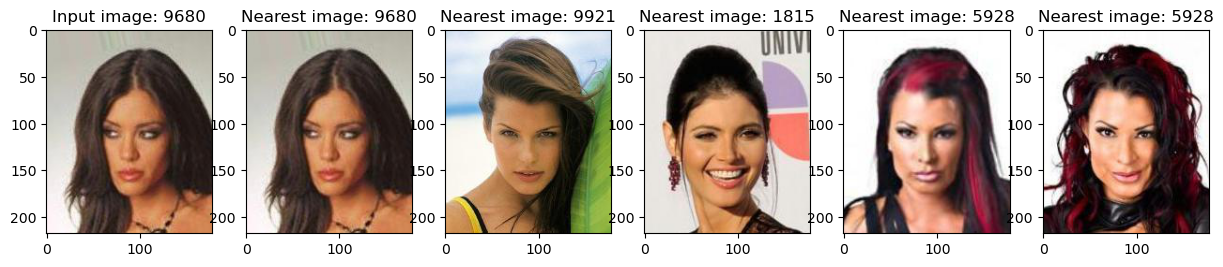

In [114]:
# Test the function on a sample image
find_nearest_images(9680)